<a href="https://colab.research.google.com/github/Mayuriluniya/Car_Damaged_Detection_Using_YOLOV5_VGG/blob/main/Mayuri_Challenge08__Multi_Lable_IRIS_colored.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="Images/PU.png" width="100%">

### Challenges : Develop ML model on Handle multi label dataset as part of Machine Learning  
#### Notebook compiled by : Rajiv Kale, Consultant at Learning and Development  
** Important ! ** For internal circulation only 

### In this notebook you would demonstrate how to handle dataset that contains more than one labels each containing two or more calsses

### Iris_colored Dataset 

This is a synthetically created dataset out of original and famous Iris dataset where one attribute Color is added. 

So, essentially there are two labels in this dataset - Species and Color

In [ ]:
import pandas as pd
import numpy as np
from numpy import zeros

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iris_colored = pd.read_csv("/content/drive/MyDrive/Datasets/IRIS_colored.csv",index_col=0)
iris_colored.head(10)

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color
0,1,5.1,3.5,1.4,0.2,setosa,blue
1,2,4.9,3.0,1.4,0.2,setosa,blue
2,3,4.7,3.2,1.3,0.2,setosa,blue
3,4,4.6,3.1,1.5,0.2,setosa,blue
4,5,5.0,3.6,1.4,0.2,setosa,blue
5,6,5.4,3.9,1.7,0.4,setosa,pink
6,7,4.6,3.4,1.4,0.3,setosa,blue
7,8,5.0,3.4,1.5,0.2,setosa,blue
8,9,4.4,2.9,1.4,0.2,setosa,blue
9,10,4.9,3.1,1.5,0.1,setosa,blue


In [ ]:
iris_colored.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
 6   Color         150 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 9.4+ KB


In [ ]:
iris_colored["Species"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
iris_colored.drop("ID", axis=1,inplace=True)

In [ ]:
import seaborn as sns
sns.set(style="white", color_codes=True)

### Scatter Plot 

Get different color for each "Species" scatter plot on Petal.Length and Sepal.Width

In the same way get different color for each "Color" scatter plot on Petal.Length and Sepal.Width

Hint: Make use of Seaborn library and hue= parameter

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


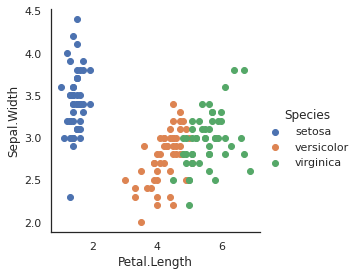

In [ ]:

sns.FacetGrid(iris_colored,hue='Species',size=4).map(plt.scatter,'Petal.Length','Sepal.Width').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


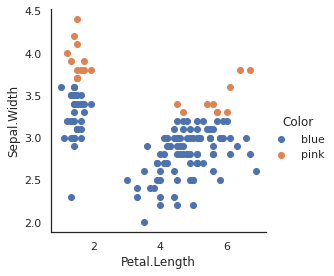

In [ ]:
sns.FacetGrid(iris_colored,hue='Color',size=4).map(plt.scatter,'Petal.Length','Sepal.Width').add_legend()

In [ ]:
len(iris_colored)

150

In [ ]:
iris_colored.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color
145,6.7,3.0,5.2,2.3,virginica,blue
146,6.3,2.5,5.0,1.9,virginica,blue
147,6.5,3.0,5.2,2.0,virginica,blue
148,6.2,3.4,5.4,2.3,virginica,pink
149,5.9,3.0,5.1,1.8,virginica,blue


Now that we have two labels in dataset write a code to transform them to one-hot-encoded representation

One of the ways could be to make use of pd.get_dummies()

In [ ]:
iris_colored = pd.get_dummies(data=iris_colored,columns=["Species","Color"])


In [ ]:
iris_colored.head(10)

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica,Color_blue,Color_pink
0,1,5.1,3.5,1.4,0.2,1,0,0,1,0
1,2,4.9,3.0,1.4,0.2,1,0,0,1,0
2,3,4.7,3.2,1.3,0.2,1,0,0,1,0
3,4,4.6,3.1,1.5,0.2,1,0,0,1,0
4,5,5.0,3.6,1.4,0.2,1,0,0,1,0
5,6,5.4,3.9,1.7,0.4,1,0,0,0,1
6,7,4.6,3.4,1.4,0.3,1,0,0,1,0
7,8,5.0,3.4,1.5,0.2,1,0,0,1,0
8,9,4.4,2.9,1.4,0.2,1,0,0,1,0
9,10,4.9,3.1,1.5,0.1,1,0,0,1,0


In [ ]:
iris_colored.tail()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica,Color_blue,Color_pink
145,146,6.7,3.0,5.2,2.3,0,0,1,1,0
146,147,6.3,2.5,5.0,1.9,0,0,1,1,0
147,148,6.5,3.0,5.2,2.0,0,0,1,1,0
148,149,6.2,3.4,5.4,2.3,0,0,1,0,1
149,150,5.9,3.0,5.1,1.8,0,0,1,1,0


### Preparing inputs and outputs 

In [ ]:
X=iris_colored[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].values

In [ ]:
y=iris_colored[['Species_setosa','Species_versicolor','Species_virginica','Color_blue','Color_pink']].values

In [ ]:
print(X.shape)
print(y.shape)

(150, 4)
(150, 5)


Make use of our standard LogisticRegression and see if it works...

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
X_train.shape

(112, 4)

In [ ]:
X_test.shape

(38, 4)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [ ]:
LR.fit(X_train,y_train)

ValueError: ignored

Explore various ways to handle dataset of this kind

##### This is a multi-lable classification problem and can be handled in different ways such as Binary Relevance, Classifier Chains, Label Powerset and even adapted multi label classifier such as MlkNN

Tip: You would be doing following imports besides standard ones

#from skmultilearn.problem_transform import BinaryRelevance
#from skmultilearn.problem_transform import ClassifierChain
#from skmultilearn.problem_transform import LabelPowerset
#from skmultilearn.adapt import MLkNN

##### Binary Relevance

 treats each label as a separate single class classification problem. Library provides this functionality.

In [ ]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 4.2MB/s 


In [ ]:
from skmultilearn.problem_transform import BinaryRelevance


In [ ]:
classifier = BinaryRelevance(LogisticRegression())

In [ ]:
# train
classifier.fit(X_train, y_train)

BinaryRelevance(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l2', random_state=None,
                                              solver='lbfgs', tol=0.0001,
                                              verbose=0, warm_start=False),
                require_dense=[True, True])

In [ ]:
# predict
y_predict=classifier.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict)

0.5789473684210527

Now, in a multi-label classification problem, we can’t simply use our normal metrics to calculate the accuracy of our predictions. For that purpose, we will use **accuracy score** metric. This function calculates subset accuracy meaning the predicted set of labels should exactly match with the true set of labels.

##### using classifier chains

In this, the first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain. 

In [ ]:
from skmultilearn.problem_transform import ClassifierChain
classifier = ClassifierChain(LogisticRegression())

In [ ]:
# train
classifier.fit(X_train, y_train)

ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l2', random_state=None,
                                              solver='lbfgs', tol=0.0001,
                                              verbose=0, warm_start=False),
                order=None, require_dense=[True, True])

In [ ]:
# predict
y_predict = classifier.predict(X_test)

In [ ]:
# evaluate
accuracy_score(y_test,y_predict)

0.7631578947368421

##### Label Powerset

In this, we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.

Effectively what we are doing is creating additional label column that contains unique mapped label value for every possible combination of values in real labels

In above example for output labels (y1 to y4) there are 4 unique combinations. Bottom table shows single label dataset where output label shows four mapped values  

In [ ]:
from skmultilearn.problem_transform import LabelPowerset

In [ ]:
classifier = LabelPowerset(LogisticRegression())

In [ ]:
# train
classifier.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LabelPowerset(classifier=LogisticRegression(C=1.0, class_weight=None,
                                            dual=False, fit_intercept=True,
                                            intercept_scaling=1, l1_ratio=None,
                                            max_iter=100, multi_class='auto',
                                            n_jobs=None, penalty='l2',
                                            random_state=None, solver='lbfgs',
                                            tol=0.0001, verbose=0,
                                            warm_start=False),
              require_dense=[True, True])

In [ ]:
# predict
y_predict = classifier.predict(X_test)

In [ ]:
# evaluate

In [ ]:
accuracy_score(y_test,y_predict)

0.8157894736842105

##### Adapted Multi-Label Classifier

Instead of transforming multi-label dataset into many single label datasets here we adapt the algorithm itself to handle multi-label dataset 

multi-label version of kNN is represented by MLkNN

In [ ]:
from skmultilearn.adapt import MLkNN
classifier = MLkNN(k=20)

In [ ]:
# train
classifier.fit(X_train, y_train)


MLkNN(ignore_first_neighbours=0, k=20, s=1.0)

In [ ]:
# predict
y_predict = classifier.predict(X_test)

In [ ]:
# evaluate
accuracy_score(y_test,y_predict)

0.7368421052631579

##### Before you submit the solution - Make sure to rename the notebook by including your name as part of the file-name for easy identification